In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

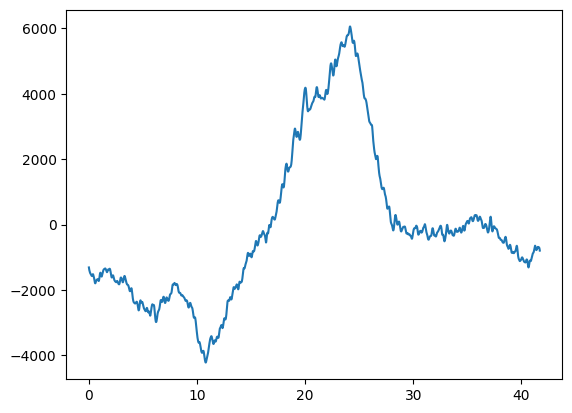

In [3]:
df = pd.read_csv('N1_evoked_raw_100_F1_R1.csv')
sig_avg = df['both']
t = df['t']

plt.plot(t, sig_avg)

In [4]:
def find_index_peak(t_arr: np.ndarray, 
                   signal: np.ndarray, 
                   t_min: int, 
                   t_max: int,
                   take_abs: bool=False,
                   plot: bool=True) -> tuple[int, float]:
    """
    Finds the largest amplitude of a signal within t_min < t < t_max

    Args:
        t_arr (np.ndarray): time array
        signal (np.ndarray): signal array
        t_min (int): initial time to analyze
        t_max (int): final time to analyze
        take_abs (bool): indicates whether or not to analyze the 
        plot (bool, optional):. Defaults to True.

    Returns:
        tuple[int, float]: idx_peak (time index of found peak), amplitude (max - min in segment)
    """
    original_signal = np.copy(signal)
    if take_abs:
        signal = np.abs(signal - signal.mean()) # make zero-mean and take abs
    
    fs = int(len(t)/t[len(t) - 1]) # not necessarily in hertz! 
    idx_min = int(fs*t_min)
    idx_max = int(fs*t_max)
    idx_peak = np.argmax(signal[idx_min: idx_max]) + idx_min
    
    if plot:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(t, original_signal, label='Signal')
        ax.plot(t[idx_min: idx_max], original_signal[idx_min: idx_max], label='Segment')
        ax.plot(t[idx_peak], original_signal[idx_peak], 'ro', label='peak')
        ax.set_xlabel('t [ms]')
        ax.set_ylabel('v [nv]')
        plt.legend()
        plt.show()

    return t[idx_peak], signal[idx_peak]

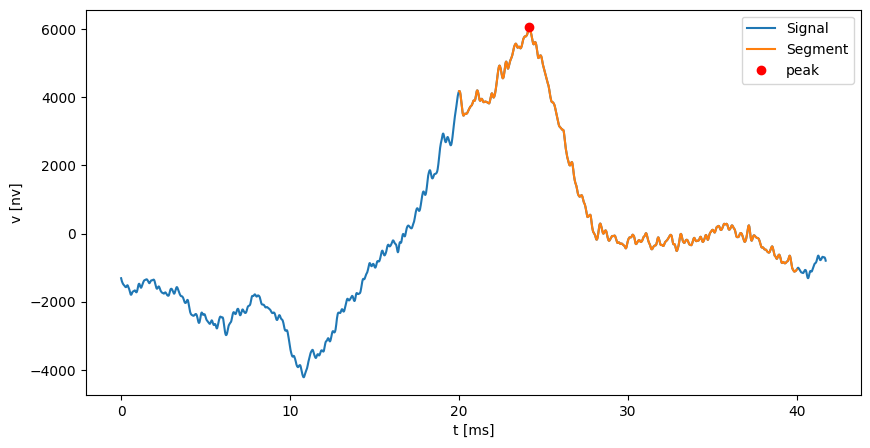

amplitude_aml=6144.424298375294


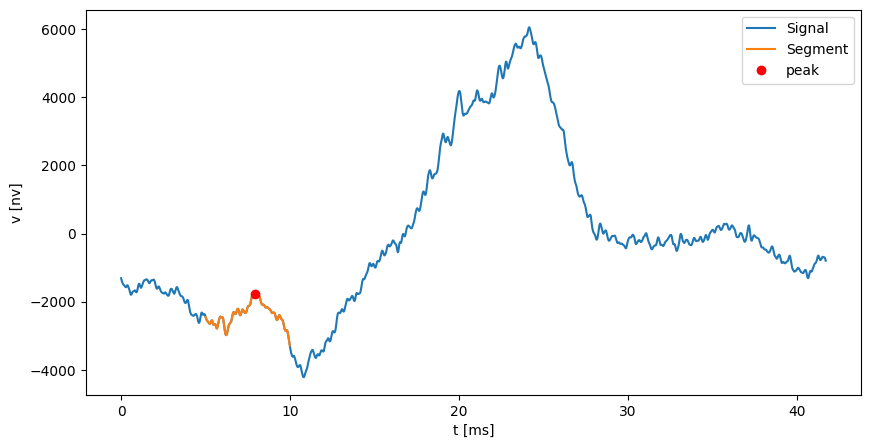

amplitude_wave5=-1785.4591420733605


In [5]:
idx_peak_aml, amplitude_aml = find_index_peak(t, sig_avg, 20, 40, take_abs=True, plot=True)
print(f"{amplitude_aml=}")
idx_peak_wave5, amplitude_wave5 = find_index_peak(t, sig_avg, 5, 10, take_abs=False, plot=True)
print(f"{amplitude_wave5=}")